# Mall Customer Segmentation Using K-Means Clustering
Dataset from Kaggle: [Mall Customer Segmentation Data](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python)

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000    

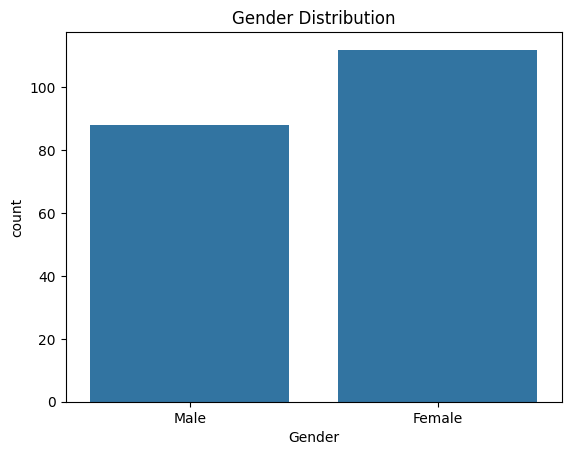

In [4]:
print(df.info())
print(df.describe())
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

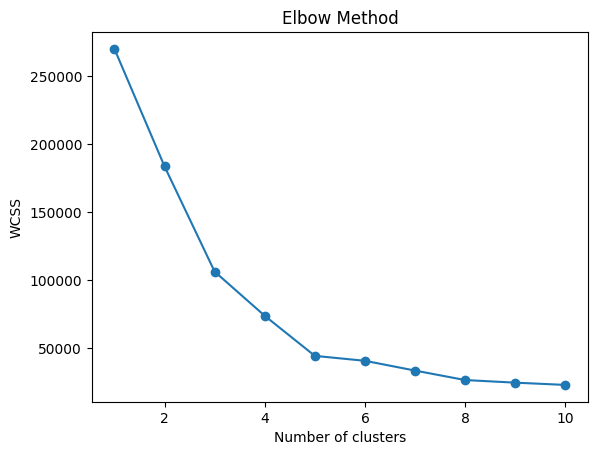

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

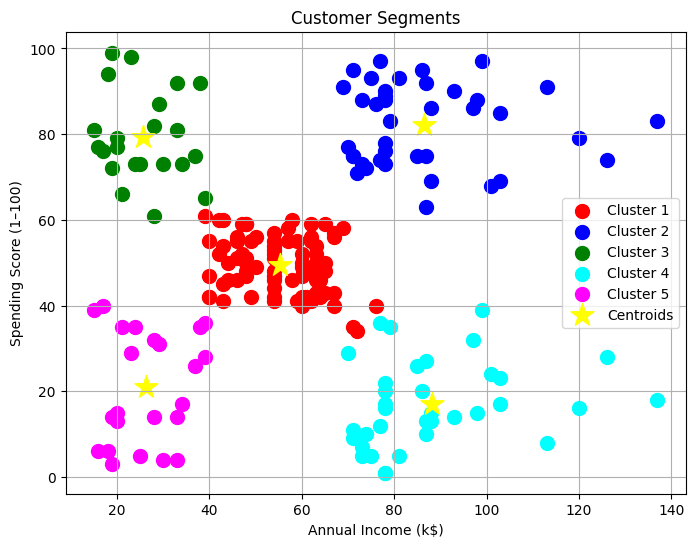

In [8]:
plt.figure(figsize=(8,6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X.values[y_kmeans == i, 0], X.values[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='yellow', label='Centroids', marker='*')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Add cluster labels to dataset
df['Cluster'] = y_kmeans
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


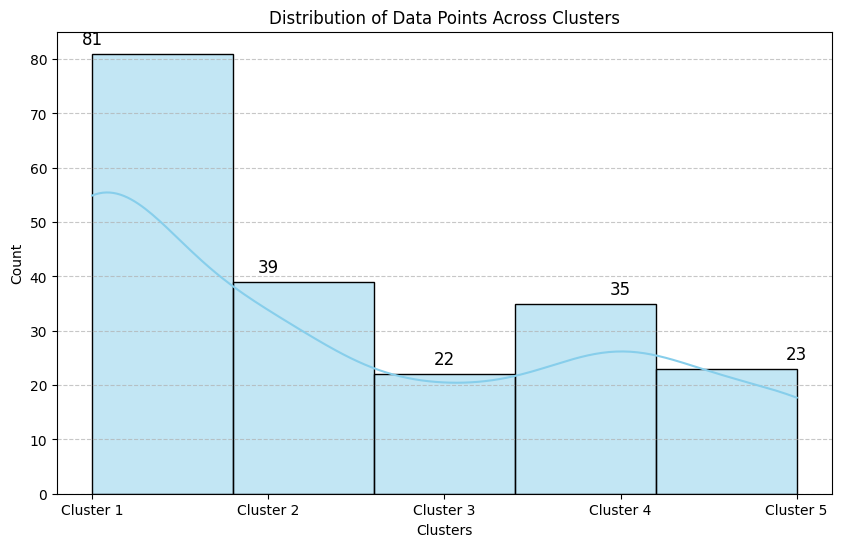

In [19]:
# Plot a histogram showing the distribution of data points across clusters using seaborn.
# Customize the x-axis to label clusters as 'Cluster 1', 'Cluster 2', etc.
# Add count labels on top of each bar make sure they are closer to the center of the bar's top.
# Use a KDE overlay for smoother distribution.
# Set the title and axis labels. Style the plot for clarity

plt.figure(figsize=(10, 6))
sns.histplot(df['Cluster'], bins=5, kde=True, stat='count', color='skyblue')
plt.title('Distribution of Data Points Across Clusters')
plt.xlabel('Clusters')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=[f'Cluster {i+1}' for i in range(5)])
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i in range(5):
    count = (df['Cluster'] == i).sum()
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=12)
plt.show()